In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Load Libraries

In [3]:
## Plotting Libaray
import matplotlib.pyplot as plt ## used for creating Graphs and charts
import seaborn as sns ## used for creating Graphs and charts
import plotly.express as px
## Pandas Dataframe Library
import pandas as pd
## Numpy Library
import numpy as np ## used for methamtical compution and handle multi-dimensional arrays and matrices
## Train and Test Split
from sklearn.model_selection import train_test_split
## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Normalize
from sklearn.preprocessing import StandardScaler
## Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.optimizers import *
## Kfold and ROC
from sklearn.metrics import accuracy_score,auc
from sklearn import preprocessing



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Importing dataset


In [4]:
df = pd.read_csv(r'/kaggle/input/dataset-for-ddos/dataset_treino.csv')
df.head()

/tmp/ipykernel_28/1140618313.py:1: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/kaggle/input/dataset-for-ddos/dataset_treino.csv')


,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,780096,4979,192.168.50.6-4.2.2.4-63551-53-17,192.168.50.6,63551,4.2.2.4,53,17,26:05.4,20787,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
1,683315,2,192.168.50.8-52.7.108.194-59394-443-6,192.168.50.8,59394,52.7.108.194,443,6,25:40.6,60642,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
2,643116,24064,192.168.50.8-52.73.38.228-59387-443-6,192.168.50.8,59387,52.73.38.228,443,6,25:30.3,62448,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
3,771744,24951,192.168.50.6-4.2.2.4-53190-53-17,192.168.50.6,53190,4.2.2.4,53,17,26:03.2,65249,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
4,1738272,17502,192.168.50.7-4.2.2.4-56785-53-17,192.168.50.7,56785,4.2.2.4,53,17,30:25.5,20751,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN


In [5]:

display(df)

,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,780096,4979,192.168.50.6-4.2.2.4-63551-53-17,192.168.50.6,63551,4.2.2.4,53,17,26:05.4,20787,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
1,683315,2,192.168.50.8-52.7.108.194-59394-443-6,192.168.50.8,59394,52.7.108.194,443,6,25:40.6,60642,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
2,643116,24064,192.168.50.8-52.73.38.228-59387-443-6,192.168.50.8,59387,52.73.38.228,443,6,25:30.3,62448,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
3,771744,24951,192.168.50.6-4.2.2.4-53190-53-17,192.168.50.6,53190,4.2.2.4,53,17,26:03.2,65249,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
4,1738272,17502,192.168.50.7-4.2.2.4-56785-53-17,192.168.50.7,56785,4.2.2.4,53,17,30:25.5,20751,...,0.0,0,0,0.0,0.0,0,0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794528,300271,337381,172.16.0.5-192.168.50.1-62927-63082-6,172.16.0.5,62927,192.168.50.1,63082,6,30:18.7,1,...,0.0,0,0,0.0,0.0,0,0,0,1,UDP-lag
794529,190123,329262,172.16.0.5-192.168.50.1-27811-23167-6,172.16.0.5,27811,192.168.50.1,23167,6,30:00.1,49,...,0.0,0,0,0.0,0.0,0,0,0,1,UDP-lag
794530,67206,138082,172.16.0.5-192.168.50.1-17506-21584-6,172.16.0.5,17506,192.168.50.1,21584,6,29:44.4,1,...,0.0,0,0,0.0,0.0,0,0,0,1,UDP-lag
794531,137032,187874,172.16.0.5-192.168.50.1-52958-51059-6,172.16.0.5,52958,192.168.50.1,51059,6,29:52.8,1,...,0.0,0,0,0.0,0.0,0,0,0,1,UDP-lag


In [6]:

unwanted = [ 'Unnamed: 0',  'Unnamed: 0.1', 'SimillarHTTP', 'Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Idle Std', ]

In [7]:

df.drop(unwanted, axis = 1, inplace= True)

In [8]:
display(df)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Inbound,Label
0,63551,53,17,20787,2,2,62,178,31,31,...,20,0.0,0.0,0,0,0.0,0,0,0,BENIGN
1,59394,443,6,60642,1,3,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0,0,0,BENIGN
2,59387,443,6,62448,2,2,2,0,1,1,...,20,0.0,0.0,0,0,0.0,0,0,0,BENIGN
3,53190,53,17,65249,2,2,62,118,31,31,...,20,0.0,0.0,0,0,0.0,0,0,0,BENIGN
4,56785,53,17,20751,2,2,82,562,41,41,...,20,0.0,0.0,0,0,0.0,0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794528,62927,63082,6,1,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0,0,1,UDP-lag
794529,27811,23167,6,49,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0,0,1,UDP-lag
794530,17506,21584,6,1,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0,0,1,UDP-lag
794531,52958,51059,6,1,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0,0,1,UDP-lag


check missing values

In [9]:
df.isnull().sum()

Source Port          0
Destination Port     0
Protocol             0
Flow Duration        0
Total Fwd Packets    0
                    ..
Idle Mean            0
Idle Max             0
Idle Min             0
Inbound              0
Label                0
Length: 81, dtype: int64

In [10]:
df = df.dropna()


In [11]:
columns_to_convert = ['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Bytes/s',  'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd Packets/s', 'Packet Length Std', 'Packet Length Variance', 'Down/Up Ratio', 'Active Mean', 'Active Std', 'Active Min']

# Convert selected columns from float to int
df[columns_to_convert] = df[columns_to_convert].astype(int)



In [12]:
display(df)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Inbound,Label
0,63551,53,17,20787,2,2,62,178,31,31,...,20,0,0,0,0,0.0,0,0,0,BENIGN
1,59394,443,6,60642,1,3,0,0,0,0,...,20,0,0,0,0,0.0,0,0,0,BENIGN
2,59387,443,6,62448,2,2,2,0,1,1,...,20,0,0,0,0,0.0,0,0,0,BENIGN
3,53190,53,17,65249,2,2,62,118,31,31,...,20,0,0,0,0,0.0,0,0,0,BENIGN
4,56785,53,17,20751,2,2,82,562,41,41,...,20,0,0,0,0,0.0,0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794528,62927,63082,6,1,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0,0,1,UDP-lag
794529,27811,23167,6,49,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0,0,1,UDP-lag
794530,17506,21584,6,1,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0,0,1,UDP-lag
794531,52958,51059,6,1,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0,0,1,UDP-lag


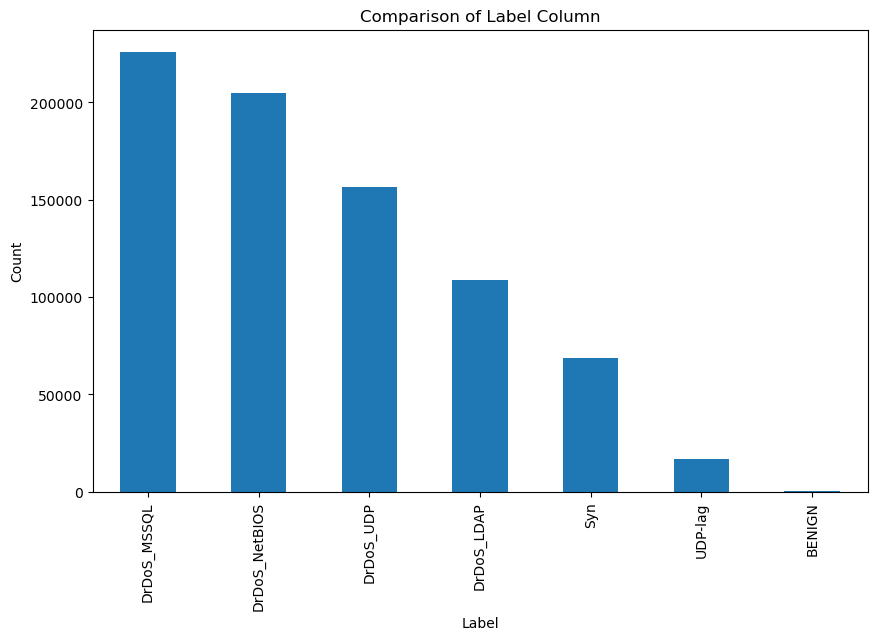

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [14]:
df.head(5)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Inbound,Label
0,63551,53,17,20787,2,2,62,178,31,31,...,20,0,0,0,0,0.0,0,0,0,BENIGN
1,59394,443,6,60642,1,3,0,0,0,0,...,20,0,0,0,0,0.0,0,0,0,BENIGN
2,59387,443,6,62448,2,2,2,0,1,1,...,20,0,0,0,0,0.0,0,0,0,BENIGN
3,53190,53,17,65249,2,2,62,118,31,31,...,20,0,0,0,0,0.0,0,0,0,BENIGN
4,56785,53,17,20751,2,2,82,562,41,41,...,20,0,0,0,0,0.0,0,0,0,BENIGN


## Number of Rows and Columns

In [15]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 782477
Number of Columns: 81


## Columns

In [16]:
df.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag 

# Type of Columns

In [17]:
df.dtypes

Source Port            int64
Destination Port       int64
Protocol               int64
Flow Duration          int64
Total Fwd Packets      int64
                      ...   
Idle Mean            float64
Idle Max               int64
Idle Min               int64
Inbound                int64
Label                 object
Length: 81, dtype: object

## SUmmary
* Count
* mean
* Min
* Max
* STD

In [18]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Inbound
count,782477.000000,782477.000000,782477.000000,7.824770e+05,782477.000000,782477.000000,782477.000000,782477.000000,782477.000000,782477.000000,...,782477.000000,7.824770e+05,7.824770e+05,7.824770e+05,7.824770e+05,7.824770e+05,7.824770e+05,7.824770e+05,7.824770e+05,782477.000000
mean,25614.650294,32865.137076,15.828015,9.839497e+05,3.059050,0.042088,1144.274886,1.369031,510.704109,504.687972,...,1.257095,-5.580346e+07,3.600599e+02,5.749096e+02,1.281140e+03,7.265299e+01,2.339465e+05,3.228245e+05,1.708404e+05,0.999095
std,23963.487098,18872.895805,3.394399,9.232507e+06,218.175865,0.520800,1027.208416,290.398322,442.797903,444.757093,...,1.652996,2.370472e+08,2.423197e+04,2.996300e+04,6.413410e+04,1.805723e+04,2.154269e+06,2.997520e+06,1.668849e+06,0.030067
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,829.000000,16531.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000,229.000000,229.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,23278.000000,32848.000000,17.000000,1.000000e+00,2.000000,0.000000,834.000000,0.000000,393.000000,383.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,48423.000000,49212.000000,17.000000,2.000000e+00,2.000000,0.000000,1438.000000,0.000000,550.000000,550.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,65532.000000,65535.000000,17.000000,1.199977e+08,86220.000000,212.000000,59076.000000,188812.000000,2969.000000,1472.000000,...,167.000000,1.480000e+03,9.265669e+06,4.037789e+06,9.265669e+06,9.265669e+06,1.102974e+08,1.102974e+08,1.102974e+08,1.000000


## Description for Categorical Columns

In [19]:
df.describe(include=['object'])

,Label
count,782477
unique,7
top,DrDoS_MSSQL
freq,226143


## Data Info Checking any Null Value

In [20]:
df.isnull().sum()

Source Port          0
Destination Port     0
Protocol             0
Flow Duration        0
Total Fwd Packets    0
                    ..
Idle Mean            0
Idle Max             0
Idle Min             0
Inbound              0
Label                0
Length: 81, dtype: int64

In [21]:
## The methatical model of linear interpolation is performed on the dataframe to handle data linearly
df = df.interpolate()

In [22]:
## Padding Interpolation is used to fill in the gaps left by Linear Interpolation. When using padding interpolation, you must set a limit, which is the maximum amount of nans the technique may fill in a row.
df = df.interpolate(method='pad', limit=15)

In [23]:
df.isnull().sum()

Source Port          0
Destination Port     0
Protocol             0
Flow Duration        0
Total Fwd Packets    0
                    ..
Idle Mean            0
Idle Max             0
Idle Min             0
Inbound              0
Label                0
Length: 81, dtype: int64

## Exploratory Analysis

In [24]:

cases= df['Label'].value_counts()
cases

DrDoS_MSSQL      226143
DrDoS_NetBIOS    204676
DrDoS_UDP        156755
DrDoS_LDAP       109007
Syn               68869
UDP-lag           16504
BENIGN              523
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

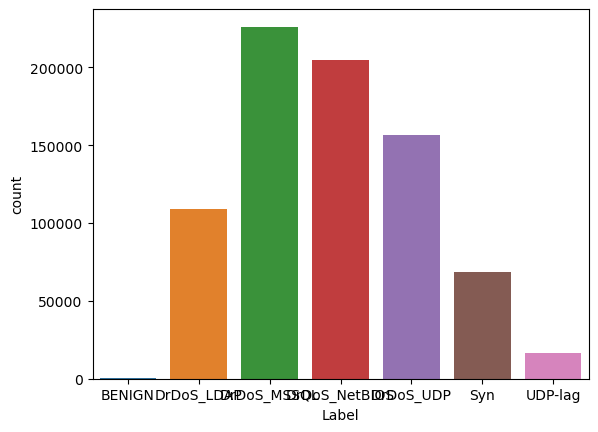

In [25]:
sns.countplot(x = df['Label'])

**Correlation**

/tmp/ipykernel_28/598526462.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)
/tmp/ipykernel_28/598526462.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)
/tmp/ipykernel_28/598526462.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to

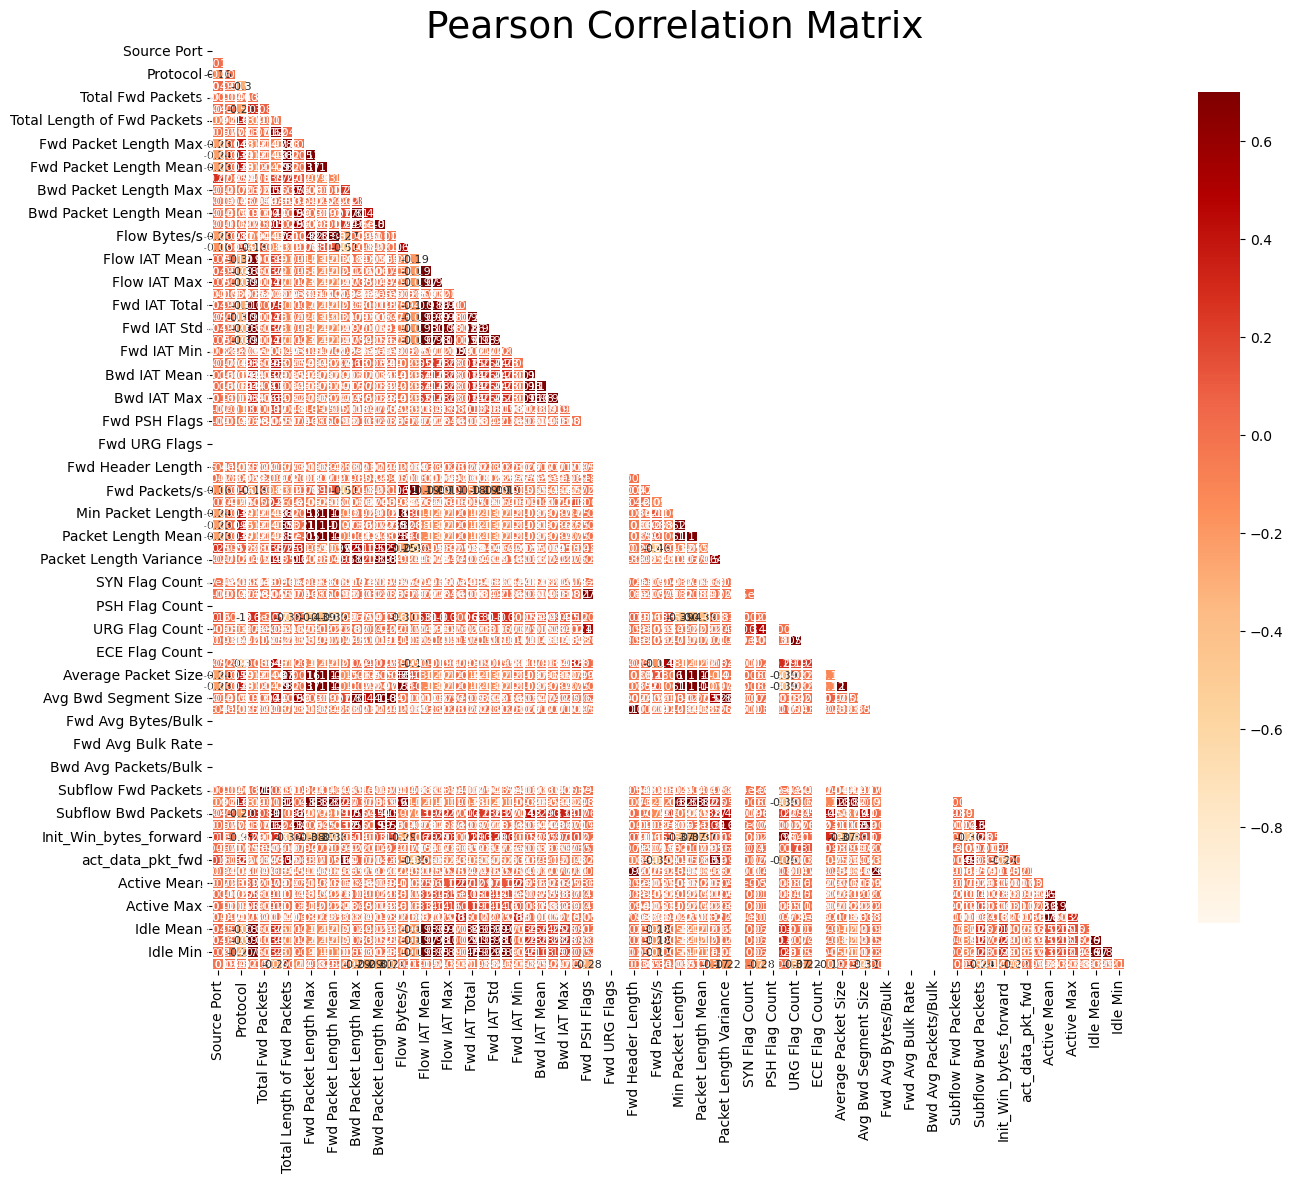

In [26]:
features = df.columns ## Fetching all Features Column names
## Applying Pearson Correaltion
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
## Creating a Plot Diagram
f, ax = plt.subplots(figsize=(16, 12))
## Title of Plot
plt.title('Pearson Correlation Matrix',fontsize=27)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd",
linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});
plt.savefig('Correlation_Features.pdf')

In [27]:
relevant_features = mask[mask>0.9] ## selecting features with 80% correlation
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/tmp/ipykernel_28/346614276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
/tmp/ipykernel_28/346614276.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [28]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(df[to_drop], axis=1)
to_drop

['Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'RST Flag Count',
 'ACK Flag Count',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [29]:
df.shape

(782477, 51)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782477 entries, 0 to 794532
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Source Port                  782477 non-null  int64 
 1   Destination Port             782477 non-null  int64 
 2   Protocol                     782477 non-null  int64 
 3   Flow Duration                782477 non-null  int64 
 4   Total Fwd Packets            782477 non-null  int64 
 5   Total Backward Packets       782477 non-null  int64 
 6   Total Length of Fwd Packets  782477 non-null  int64 
 7   Total Length of Bwd Packets  782477 non-null  int64 
 8   Fwd Packet Length Max        782477 non-null  int64 
 9   Fwd Packet Length Std        782477 non-null  int64 
 10  Bwd Packet Length Max        782477 non-null  int64 
 11  Bwd Packet Length Min        782477 non-null  int64 
 12  Bwd Packet Length Mean       782477 non-null  int64 
 13  Flow Bytes/s  

# **Convert string to numerical**

In [31]:
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,...,Bwd Avg Bulk Rate,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Inbound,Label
0,63551,53,17,20787,2,2,62,178,31,0,...,0,-1,1,20,0,0,0,0,0,BENIGN
1,59394,443,6,60642,1,3,0,0,0,0,...,0,121,0,20,0,0,0,0,0,BENIGN
2,59387,443,6,62448,2,2,2,0,1,0,...,0,33580,1,20,0,0,0,0,0,BENIGN
3,53190,53,17,65249,2,2,62,118,31,0,...,0,-1,1,20,0,0,0,0,0,BENIGN
4,56785,53,17,20751,2,2,82,562,41,0,...,0,-1,1,20,0,0,0,0,0,BENIGN


In [32]:
df.shape

(782477, 51)

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [34]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])


In [35]:
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,...,Bwd Avg Bulk Rate,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Inbound,Label
0,63551,53,17,20787,2,2,62,178,31,0,...,0,-1,1,20,0,0,0,0,0,0
1,59394,443,6,60642,1,3,0,0,0,0,...,0,121,0,20,0,0,0,0,0,0
2,59387,443,6,62448,2,2,2,0,1,0,...,0,33580,1,20,0,0,0,0,0,0
3,53190,53,17,65249,2,2,62,118,31,0,...,0,-1,1,20,0,0,0,0,0,0
4,56785,53,17,20751,2,2,82,562,41,0,...,0,-1,1,20,0,0,0,0,0,0


# **Feature Selection**

# Random Forest Feature Importance

In [36]:
x=df.drop(['Label'], axis = 1)
y=df.Label

In [37]:
x

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,...,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Inbound
0,63551,53,17,20787,2,2,62,178,31,0,...,0,0,-1,1,20,0,0,0,0,0
1,59394,443,6,60642,1,3,0,0,0,0,...,0,0,121,0,20,0,0,0,0,0
2,59387,443,6,62448,2,2,2,0,1,0,...,0,0,33580,1,20,0,0,0,0,0
3,53190,53,17,65249,2,2,62,118,31,0,...,0,0,-1,1,20,0,0,0,0,0
4,56785,53,17,20751,2,2,82,562,41,0,...,0,0,-1,1,20,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794528,62927,63082,6,1,2,0,0,0,0,0,...,0,0,-1,0,20,0,0,0,0,1
794529,27811,23167,6,49,2,0,0,0,0,0,...,0,0,-1,0,20,0,0,0,0,1
794530,17506,21584,6,1,2,0,0,0,0,0,...,0,0,-1,0,20,0,0,0,0,1
794531,52958,51059,6,1,2,0,0,0,0,0,...,0,0,-1,0,20,0,0,0,0,1


In [38]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x, y)

RandomForestClassifier(random_state=42)

In [39]:
feature_scores = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

Total Length of Fwd Packets    0.229115
Fwd Packet Length Max          0.224291
Source Port                    0.187797
Flow Bytes/s                   0.125631
act_data_pkt_fwd               0.047774
Protocol                       0.028525
Destination Port               0.025574
Fwd Packet Length Std          0.017146
Packet Length Std              0.017093
Packet Length Variance         0.015855
Flow Duration                  0.014973
Flow IAT Mean                  0.013802
Total Fwd Packets              0.012311
Fwd Header Length              0.011180
Flow Packets/s                 0.009410
min_seg_size_forward           0.008025
Flow IAT Min                   0.004279
Bwd Header Length              0.000980
Bwd Packets/s                  0.000967
Init_Win_bytes_backward        0.000961
Total Backward Packets         0.000939
Active Min                     0.000530
Bwd IAT Total                  0.000522
Bwd IAT Mean                   0.000406
Down/Up Ratio                  0.000335


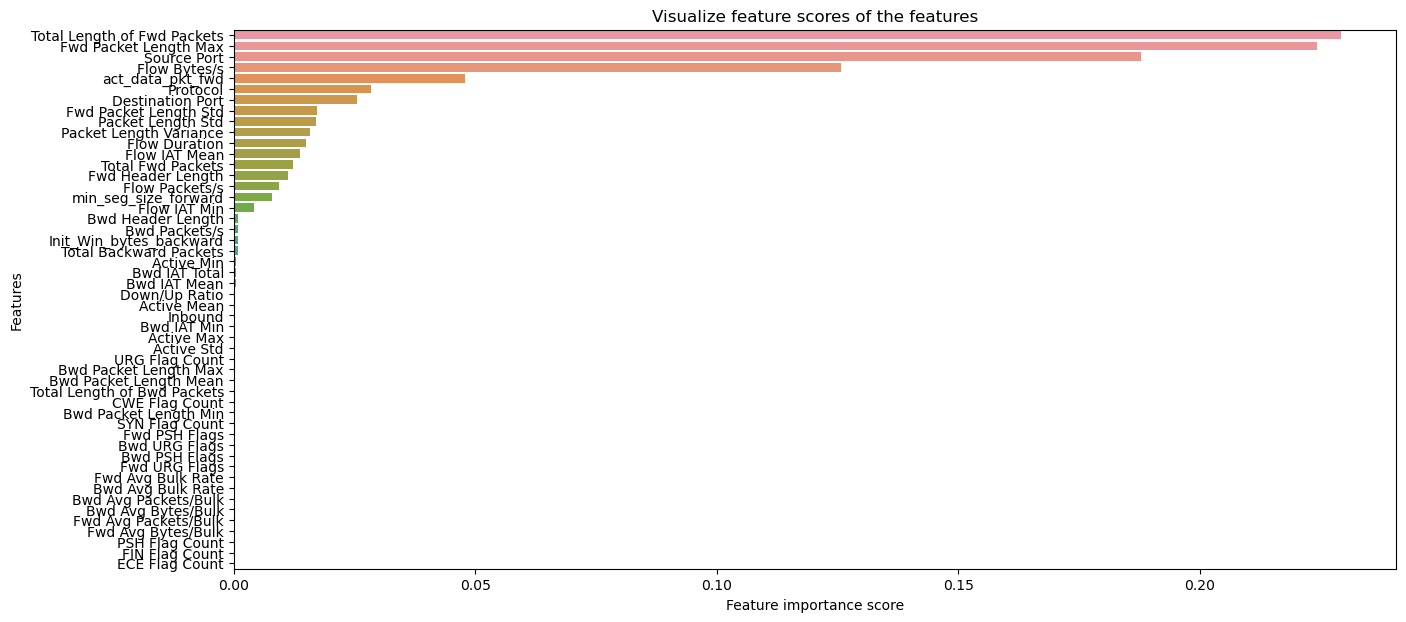

In [40]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig('revised_dataset.pdf')
plt.show()

In [41]:
## Selecting top features based on the ranking
features = feature_scores.index[0:20]
x = x[features]

In [42]:
x.shape

(782477, 20)

In [43]:
x

,Total Length of Fwd Packets,Fwd Packet Length Max,Source Port,Flow Bytes/s,act_data_pkt_fwd,Protocol,Destination Port,Fwd Packet Length Std,Packet Length Std,Packet Length Variance,Flow Duration,Flow IAT Mean,Total Fwd Packets,Fwd Header Length,Flow Packets/s,min_seg_size_forward,Flow IAT Min,Bwd Header Length,Bwd Packets/s,Init_Win_bytes_backward
0,62,31,63551,11545,1,17,53,0,31,1009,20787,6929,2,40,192,20,1,40,96,-1
1,0,0,59394,0,0,6,443,0,0,0,60642,20214,1,20,65,20,2,84,49,121
2,2,1,59387,32,1,6,443,0,0,0,62448,20816,2,40,64,20,2,40,32,33580
3,62,31,53190,2758,1,17,53,0,15,235,65249,21749,2,40,61,20,1,40,30,-1
4,82,41,56785,31034,1,17,53,0,131,17280,20751,6917,2,40,192,20,1,0,96,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794528,0,0,62927,0,0,6,63082,0,0,0,1,1,2,40,2000000,20,1,0,0,-1
794529,0,0,27811,0,0,6,23167,0,0,0,49,49,2,40,40816,20,49,0,0,-1
794530,0,0,17506,0,0,6,21584,0,0,0,1,1,2,40,2000000,20,1,0,0,-1
794531,0,0,52958,0,0,6,51059,0,0,0,1,1,2,40,2000000,20,1,0,0,-1


# **Data Normalization**

In [44]:
# Get column names first
from sklearn.preprocessing import StandardScaler
names = x.columns
# Create the Scaler object
# sc = MinMaxScaler()
sc = StandardScaler()
# Fit your data on the scaler object
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=names)

In [45]:
x = np.array(x)

In [46]:
x

array([[-1.05360856e+00, -1.08334844e+00,  1.58309072e+00, ...,
         1.96746313e-03, -3.66337190e-02, -8.78152443e-03],
       [-1.11396636e+00, -1.15335785e+00,  1.40961836e+00, ...,
         1.97803569e-03, -4.49299395e-02,  3.96914548e-01],
       [-1.11201933e+00, -1.15109948e+00,  1.40932624e+00, ...,
         1.96746313e-03, -4.79307000e-02,  1.11660725e+02],
       ...,
       [-1.11396636e+00, -1.15335785e+00, -3.38375439e-01, ...,
         1.95785171e-03, -5.35791906e-02, -8.78152443e-03],
       [-1.11396636e+00, -1.15335785e+00,  1.14104292e+00, ...,
         1.95785171e-03, -5.35791906e-02, -8.78152443e-03],
       [-1.11396636e+00, -1.15335785e+00,  1.18561075e+00, ...,
         1.95785171e-03, -5.35791906e-02, -8.78152443e-03]])

## Train and Test Split

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

## Model Training

In [48]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# **XGBoost model**

In [49]:
from sklearn.naive_bayes import MultinomialNB

mnb = xgb.XGBClassifier() 
from time import time
#Calculating fitting time
startTime = time()
score12=mnb.fit(xtrain, ytrain)


accuracy = cross_val_score(estimator=mnb, X = xtrain, y = ytrain, cv=10)
print(accuracy.mean())
print(accuracy.std())
print(accuracy)

#Making predictions and calculating the prediction time
startTime = time()
y_predict15 = mnb.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_predict15))
print(classification_report(ytest, y_predict15))
accuracyScore = accuracy_score(y_predict15, ytest )
print("Accuracy score after train test split (XGB): ", accuracyScore * 100.0)

0.9750261546950207
0.0004673508829956054
[0.97478731 0.9743674  0.97513419 0.97524328 0.97473208 0.97495116
 0.97599182 0.97460428 0.97564493 0.9748051 ]
[[  151     1     0     0     0     1     0]
 [    0 32490     7     1    13     1     0]
 [    0   364 67196     2   186     2     7]
 [    0     4   769 60660    12     1     2]
 [    0    15   492     1 46805     2     3]
 [    0     0     1     0     0 20593    11]
 [    0     3    23     1   673  3259   992]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.99      1.00      0.99     32512
           2       0.98      0.99      0.99     67757
           3       1.00      0.99      0.99     61448
           4       0.98      0.99      0.99     47318
           5       0.86      1.00      0.93     20605
           6       0.98      0.20      0.33      4951

    accuracy                           0.98    234744
   macro avg       0.97      0.88      0.8

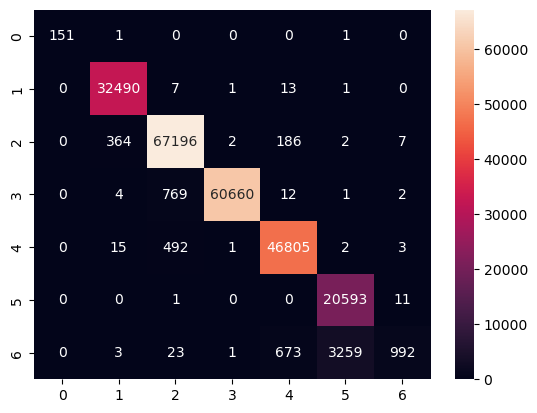

In [50]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Reverse the encoding to get the original labels
ytest_original = le.inverse_transform(ytest)
y_predict15_original = le.inverse_transform(y_predict15)

# Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest_original, y_predict15_original)

# Plot the confusion matrix as a heatmap
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")
plt.savefig('XGB_cf19M.pdf')
plt.show()

**DrDoS_MSSQL      3**

---


**DrDoS_LDAP       2**

---


**DrDoS_NetBIOS    1**

---



---


**BENIGN           0**

# **Naive Bayes Model**

0.8603516612159577
0.00467209854865532
[0.85973272 0.86128455 0.86358491 0.86173845 0.84665802 0.86307122
 0.86237745 0.86155588 0.86140982 0.86210359]
[[   36     0    33     0     1    12    71]
 [  104 32165   214     0     1     2    26]
 [   11   440 67248     1     3     1    53]
 [    1     2  3251 58097    42     9    46]
 [   57    73 23315     0 23862     4     7]
 [    0     0     7     0     0 20591     7]
 [    5    17   406     0   328  4192     3]]
              precision    recall  f1-score   support

           0       0.17      0.24      0.20       153
           1       0.98      0.99      0.99     32512
           2       0.71      0.99      0.83     67757
           3       1.00      0.95      0.97     61448
           4       0.98      0.50      0.67     47318
           5       0.83      1.00      0.91     20605
           6       0.01      0.00      0.00      4951

    accuracy                           0.86    234744
   macro avg       0.67      0.67      0.65 

<Axes: >

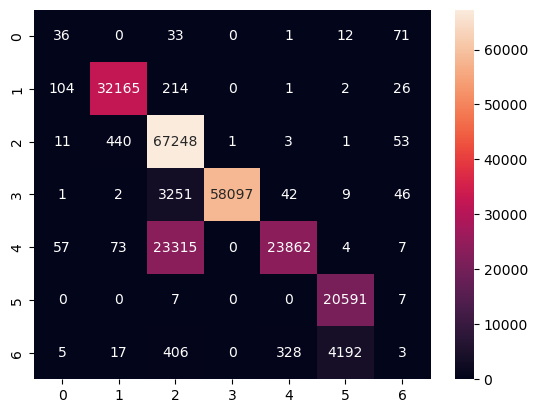

In [51]:
from sklearn.naive_bayes import MultinomialNB

mnb = GaussianNB()
from time import time
#Calculating fitting time
startTime = time()
score12=mnb.fit(xtrain, ytrain)


accuracy = cross_val_score(estimator=mnb, X = xtrain, y = ytrain, cv=10)
print(accuracy.mean())
print(accuracy.std())
print(accuracy)

#Making predictions and calculating the prediction time
startTime = time()
y_predict15 = mnb.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_predict15))
print(classification_report(ytest, y_predict15))
accuracyScore = accuracy_score(y_predict15, ytest )
print("Accuracy score after train test split (XGB): ", accuracyScore * 100.0)

#Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest, y_predict15)
print(cf_matrixmnb)
import seaborn as sns
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")

# **MLP model**

0.9711702613503459
0.0007910315144662589
[0.97042392 0.97111768 0.97120897 0.97040513 0.97117193 0.97150056
 0.97248644 0.97053293 0.97259599 0.97025907]
[[  132     0     0     1    12     8     0]
 [    0 32490    14     1     4     3     0]
 [    0   365 66675     0   704     3    10]
 [    1     6   777 60625    28    11     0]
 [    3    74   692    13 46529     7     0]
 [    1     0     1     0     1 20576    26]
 [    0    17    29     1   663  3263   978]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       153
           1       0.99      1.00      0.99     32512
           2       0.98      0.98      0.98     67757
           3       1.00      0.99      0.99     61448
           4       0.97      0.98      0.98     47318
           5       0.86      1.00      0.93     20605
           6       0.96      0.20      0.33      4951

    accuracy                           0.97    234744
   macro avg       0.96      0.86      0.8

<Axes: >

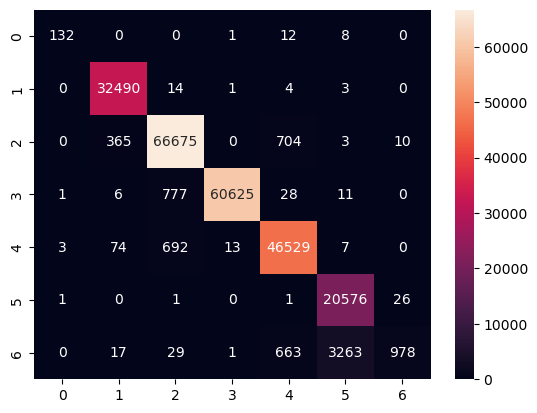

In [52]:


mnb = MLPClassifier()
from time import time
#Calculating fitting time
startTime = time()
score12=mnb.fit(xtrain, ytrain)


accuracy = cross_val_score(estimator=mnb, X = xtrain, y = ytrain, cv=10)
print(accuracy.mean())
print(accuracy.std())
print(accuracy)

#Making predictions and calculating the prediction time
startTime = time()
y_predict15 = mnb.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_predict15))
print(classification_report(ytest, y_predict15))
accuracyScore = accuracy_score(y_predict15, ytest )
print("Accuracy score after train test split (XGB): ", accuracyScore * 100.0)

#Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest, y_predict15)
print(cf_matrixmnb)
import seaborn as sns
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")

# **Logistic Regression Model**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9463972420877029
0.0008726826046159673
[0.94597802 0.94468178 0.9479315  0.94606832 0.94544757 0.9464152
 0.94709072 0.94643346 0.94703595 0.94688989]
[[   45     0     0    11    44    29    24]
 [    1 32454    50     1     0     4     2]
 [    0   491 63664    81  3506     1    14]
 [    0     2   727 60628    75    11     5]
 [    3    73  3252    17 43959     6     8]
 [    0     0     1     6     2 20477   119]
 [    0    17   125     0   609  3559   641]]
              precision    recall  f1-score   support

           0       0.92      0.29      0.45       153
           1       0.98      1.00      0.99     32512
           2       0.94      0.94      0.94     67757
           3       1.00      0.99      0.99     61448
           4       0.91      0.93      0.92     47318
           5       0.85      0.99      0.92     20605
           6       0.79      0.13      0.22      4951

    accuracy                           0.95    234744
   macro avg       0.91      0.75      0.78

<Axes: >

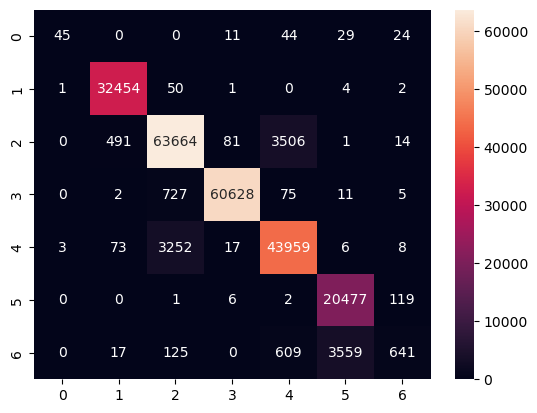

In [53]:


mnb = LogisticRegression()
from time import time
#Calculating fitting time
startTime = time()
score12=mnb.fit(xtrain, ytrain)


accuracy = cross_val_score(estimator=mnb, X = xtrain, y = ytrain, cv=10)
print(accuracy.mean())
print(accuracy.std())
print(accuracy)

#Making predictions and calculating the prediction time
startTime = time()
y_predict15 = mnb.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_predict15))
print(classification_report(ytest, y_predict15))
accuracyScore = accuracy_score(y_predict15, ytest )
print("Accuracy score after train test split (XGB): ", accuracyScore * 100.0)

#Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest, y_predict15)
print(cf_matrixmnb)
import seaborn as sns
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")

# **Decision Tree Model**

0.9548009729059302
0.00048398927535699306
[0.95503341 0.953938   0.95413882 0.95477699 0.95510562 0.95495956
 0.95537948 0.9543023  0.95495956 0.95541599]
[[  143     6     3     0     1     0     0]
 [    1 32083   392     4    28     1     3]
 [    1   371 65974   772   604     3    32]
 [    0     0   747 60680    15     6     0]
 [    0    21   521    10 46125     1   640]
 [    0     0     1     7     0 17663  2934]
 [    0     4    24     1   635  2733  1554]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       153
           1       0.99      0.99      0.99     32512
           2       0.98      0.97      0.97     67757
           3       0.99      0.99      0.99     61448
           4       0.97      0.97      0.97     47318
           5       0.87      0.86      0.86     20605
           6       0.30      0.31      0.31      4951

    accuracy                           0.96    234744
   macro avg       0.87      0.86      0.

<Axes: >

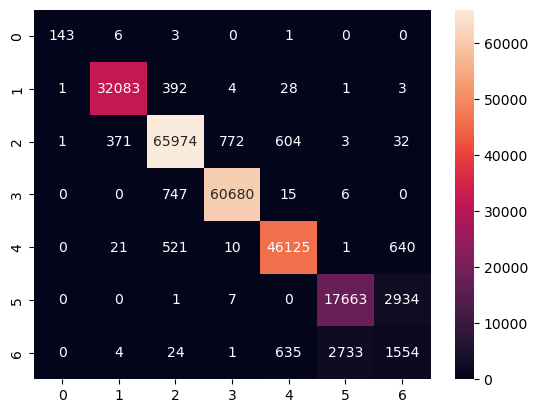

In [54]:


mnb = DecisionTreeClassifier()
from time import time
#Calculating fitting time
startTime = time()
score12=mnb.fit(xtrain, ytrain)


accuracy = cross_val_score(estimator=mnb, X = xtrain, y = ytrain, cv=10)
print(accuracy.mean())
print(accuracy.std())
print(accuracy)

#Making predictions and calculating the prediction time
startTime = time()
y_predict15 = mnb.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_predict15))
print(classification_report(ytest, y_predict15))
accuracyScore = accuracy_score(y_predict15, ytest )
print("Accuracy score after train test split (DT): ", accuracyScore * 100.0)

#Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest, y_predict15)
print(cf_matrixmnb)
import seaborn as sns
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")

# **KNN Model**

0.9627318429081161
0.0004980534696020717
[0.96266477 0.96191624 0.96310293 0.96323006 0.96266409 0.96332134
 0.96220766 0.9629562  0.96323006 0.96202509]
[[  138     0     3     1     3     6     2]
 [    1 32463    39     2     4     3     0]
 [    2   388 65468     6  1856     2    35]
 [    0     2   770 60617    48    11     0]
 [    3    74  1019     2 46211     5     4]
 [    1     0     0     0     1 20063   540]
 [    0    17    30     0   656  3181  1067]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       153
           1       0.99      1.00      0.99     32512
           2       0.97      0.97      0.97     67757
           3       1.00      0.99      0.99     61448
           4       0.95      0.98      0.96     47318
           5       0.86      0.97      0.91     20605
           6       0.65      0.22      0.32      4951

    accuracy                           0.96    234744
   macro avg       0.91      0.86      0.8

<Axes: >

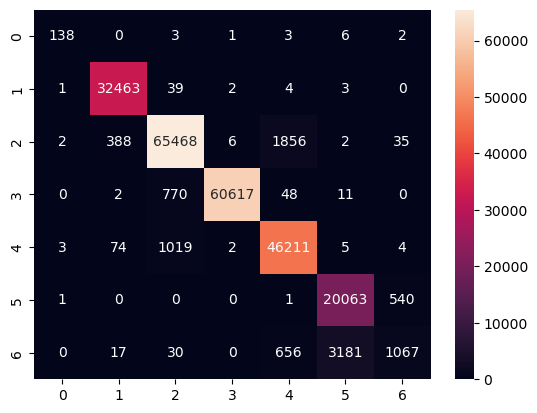

In [55]:
from sklearn.neighbors import KNeighborsClassifier




mnb = KNeighborsClassifier()
from time import time
#Calculating fitting time
startTime = time()
score12=mnb.fit(xtrain, ytrain)


accuracy = cross_val_score(estimator=mnb, X = xtrain, y = ytrain, cv=10)
print(accuracy.mean())
print(accuracy.std())
print(accuracy)

#Making predictions and calculating the prediction time
startTime = time()
y_predict15 = mnb.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_predict15))
print(classification_report(ytest, y_predict15))
accuracyScore = accuracy_score(y_predict15, ytest )
print("Accuracy score after train test split (Knn): ", accuracyScore * 100.0)

#Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest, y_predict15)
print(cf_matrixmnb)
import seaborn as sns
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")

# **Proposed Ensemble Model **

Cross-Validation Accuracy:
Mean: 0.9746427558476973
Standard Deviation: 0.00043085457566296775
Individual Scores: [0.97442217 0.97409355 0.97482382 0.97475033 0.97440345 0.97451299
 0.97560842 0.97412959 0.97507896 0.97460428]


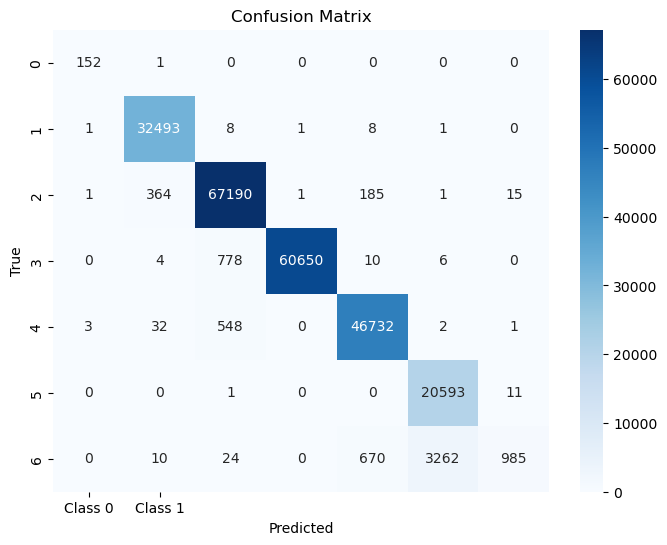

[[  152     1     0     0     0     0     0]
 [    1 32493     8     1     8     1     0]
 [    1   364 67190     1   185     1    15]
 [    0     4   778 60650    10     6     0]
 [    3    32   548     0 46732     2     1]
 [    0     0     1     0     0 20593    11]
 [    0    10    24     0   670  3262   985]]


<Axes: >

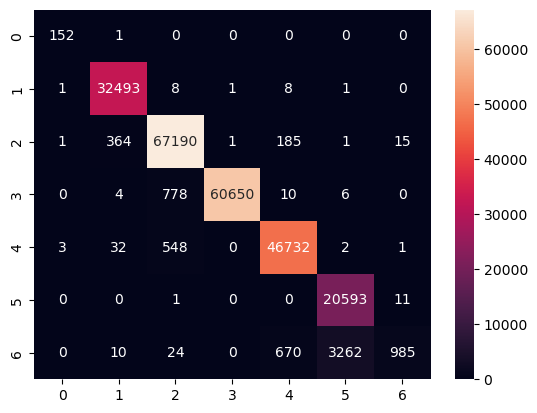

In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

# Define the individual classifiers
mlp = MLPClassifier()
dt = DecisionTreeClassifier()
xgb = xgb.XGBClassifier()

# Create the ensemble model
ensemble = VotingClassifier([('MLP', mlp), ('DecisionTreeClassifier', dt), ('XGB', xgb)])

# Perform cross-validation on the training data
accuracy = cross_val_score(estimator=ensemble, X=xtrain, y=ytrain, cv=10)
print("Cross-Validation Accuracy:")
print("Mean:", accuracy.mean())
print("Standard Deviation:", accuracy.std())
print("Individual Scores:", accuracy)

# Fit the ensemble model on the training data
ensemble.fit(xtrain, ytrain)

# Predict on the test data
predictions = ensemble.predict(xtest)

# Generate the confusion matrix
cm = confusion_matrix(ytest, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


#Get the confusion matrix
cf_matrixmnb = confusion_matrix(ytest, predictions)
print(cf_matrixmnb)
import seaborn as sns
sns.heatmap(cf_matrixmnb, annot=True, fmt="d")


In [60]:
print(classification_report(ytest, predictions))
accuracyScore = accuracy_score(predictions, ytest )
print("Accuracy score after train test split (ensemble): ", accuracyScore * 100.0)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      1.00      0.99     32512
           2       0.98      0.99      0.99     67757
           3       1.00      0.99      0.99     61448
           4       0.98      0.99      0.98     47318
           5       0.86      1.00      0.93     20605
           6       0.97      0.20      0.33      4951

    accuracy                           0.97    234744
   macro avg       0.96      0.88      0.88    234744
weighted avg       0.98      0.97      0.97    234744

Accuracy score after train test split (ensemble):  97.46574992332071
